# 0. Setup Paths

In [1]:
import os

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  0


[]

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [11]:
!pip install cuda==11.2 cudnn==8.1.0

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


ERROR: Could not find a version that satisfies the requirement cuda==11.2 (from versions: none)
ERROR: No matching distribution found for cuda==11.2


In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [8]:
if os.name=='nt':
    !pip install wget
    import wget

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [9]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [10]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

D:\project2\asap\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
D:\project2\asap\lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-310: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-310: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-310: module MAY be using inspect.stack
No local packages or working download links found for tensorflow-text~=2.11.0
error: Could not find suitable distribution for Requirement.parse('tensorflow-text~=2.11.0')


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Obtaining file:///D:/project2/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [44]:
!pip install protobuf==3.20.*

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [16]:
!pip install gin

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for gin: filename=gin-0.1.6-py3-none-any.whl size=3389 sha256=5da1f6d22b71e0d8e945a68788c55abffe4a74091673cf7ee6e5857aacc58790
  Stored in directory: c:\users\dhruv\appdata\local\pip\cache\wheels\d4\87\5b\9aa267e4470bcfab32d6dcc559d7449905894a34b8a89a9abb
Successfully built gin


In [18]:
!pip install tensorflow_addons

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.11.3 requires gin-config, which is not installed.
tf-models-official 2.11.3 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.11.3 requires immutabledict, which is not installed.
tf-models-official 2.11.3 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.11.3 requires oauth2client, which is not installed.
tf-models-official 2.11.3 requires opencv-python-headless, which is not installed.
tf-models-official 2.11.3 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.11.3 requires sentencepiece, which is not installed.
tf-models-official 2.11.3 requires seqeval, which is not installed.
tf-models-official 2.11.3 requires tensorflow-datasets, which is not installed.
tf-models-official 2.11.3 requires tensorflow-hub>=0.6.0, 


     ---------------------------------------- 0.0/732.4 kB ? eta -:--:--
     ------------------------------------- 732.4/732.4 kB 23.3 MB/s eta 0:00:00
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)


In [11]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.10.8: D:\project2\asap\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2023-02-07 10:09:18.051414: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
D:\project2\asap\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\builders\model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0207 10:09:18.202912 17092 model_builder.py:1112] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.38s
I0207 10:09:18.421645 17092 test_util.py:2457] time(__main__

In [16]:
!pip install tensorflow --upgrade

  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.44.0 requires cloudpickle~=2.2.0, which is not installed.
apache-beam 2.44.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.44.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.44.0 requires fastavro<2,>=0.23.6, which is not installed.
apache-beam 2.44.0 requires fasteners<1.0,>=0.3, which is not installed.
apache-beam 2.44.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.44.0 requires httplib2<0.21.0,>=0.8, which is not installed.
apache-beam 2.44.0 requires objsize<0.7.0,>=0.6.1, which is not installed.
apache-beam 2.44.0 requires orjson<4.0, which is not installed.
apache-beam 2.44.0 requires proto-plus<2,>=1.7.1, which is not installed.
apache-beam 2.44.0 requires pyarrow<10.0.0,>=0.15.1, which is not installed.
apache-beam 2.44.0 require

In [23]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib

Found existing installation: protobuf 3.19.6
Uninstalling protobuf-3.19.6:
  Successfully uninstalled protobuf-3.19.6
Found existing installation: matplotlib 3.6.3
Uninstalling matplotlib-3.6.3:
  Successfully uninstalled matplotlib-3.6.3
  Using cached protobuf-4.21.12-cp310-abi3-win_amd64.whl (527 kB)
  Using cached matplotlib-3.6.3-cp310-cp310-win_amd64.whl (7.2 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.11.3 requires gin-config, which is not installed.
tf-models-official 2.11.3 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.11.3 requires immutabledict, which is not installed.
tf-models-official 2.11.3 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.11.3 requires oauth2client, which is not installed.
tf-models-official 2.11.3 requires opencv-python-headless, which is not installed.
tf-models-official 2.11.3 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.11.3 requires sentencepiece, which is not installed.
tf-models-official 2.11.3 requires seqeval, which is not installed.
tf-models-official 2.11.3 requires tensorflow-datasets, which is not installed.
tf-models-official 2.11.3 requires tensorflow-hub>=0.6.0, 

In [12]:
import object_detection

In [13]:
!pip list

Package                      Version      Editable project location
---------------------------- ------------ -------------------------------------------
absl-py                      1.4.0
anyio                        3.6.2
apache-beam                  2.44.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        22.2.0
avro-python3                 1.10.2
backcall                     0.2.0
beautifulsoup4               4.11.2
bleach                       6.0.0
cachetools                   5.3.0
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           3.0.1
colorama                     0.4.6
comm                         0.1.2
contextlib2                  21.6.0
contourpy                    1.0.7
cycler                       0.11.0
Cython                       3.0.0a11
debugpy                  

In [14]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [6]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [20]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [18]:
!pip install pytz

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [16]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [17]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [8]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [9]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [20]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [21]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [22]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [23]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [28]:
!pip install cv2

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [29]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [44]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [45]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=10000


In [ ]:
!{command}

# 7. Evaluate the Model

In [20]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [21]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [22]:
!{command}

^C


# 8. Load Train Model From Checkpoint

In [178]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [179]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-12')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [45]:
!pip install --upgrade opencv-python

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
     ---------------------------------------- 0.2/38.2 MB 6.3 MB/s eta 0:00:07
     ---------------------------------------- 0.4/38.2 MB 5.3 MB/s eta 0:00:08
      --------------------------------------- 0.6/38.2 MB 4.8 MB/s eta 0:00:08
      --------------------------------------- 0.8/38.2 MB 4.9 MB/s eta 0:00:08
     - -------------------------------------- 1.0/38.2 MB 4.7 MB/s eta 0:00:08
     - -------------------------------------- 1.2/38.2 MB 4.6 MB/s eta 0:00:08
     - -------------------------------------- 1.5/38.2 MB 4.8 MB/s eta 0:00:08
     - -------------------------------------- 1.8/38.2 MB 4.7 MB/s eta 0:00:08
     -- ------------------------------------- 2.0/38.2 MB 4.8 MB/s eta 0:00:08
     -- ------------------------------------- 2.2/38.2 MB 4.8 MB/s eta 0:00:08
     -- ------------------------------------- 2.5/38.2 MB 5.0 MB/

In [180]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [181]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [182]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '3_148.jpg')

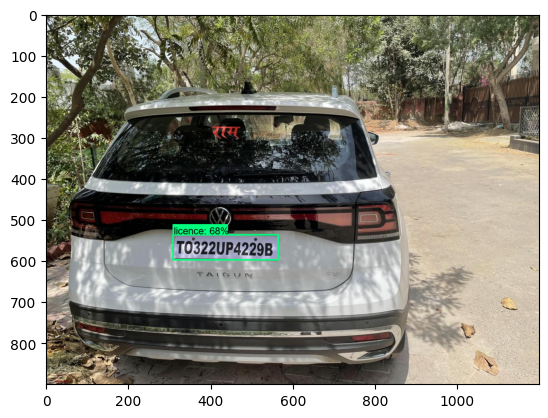

In [183]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.1,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [101]:
!pip install easyocr

  Using cached easyocr-1.6.2-py3-none-any.whl (2.9 MB)
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ------------- -------------------------- 0.4/1.1 MB 11.6 MB/s eta 0:00:01
     ---------------------------------- ----- 0.9/1.1 MB 11.9 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 9.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/162.6 MB ? eta -:--:--
     --------------------------------------- 0.6/162.6 MB 12.9 MB/s eta 0:00:13
     --------------------------------------- 1.2/162.6 MB 13.1 MB/s eta 0:00:13
     --------------------------------------- 1.8/162.6 MB 12.8 MB/s eta 0:00:13
      -------------------------------------- 2.5/162.6 MB 13.1 MB/s eta 0:00:13
      -------------------------------------- 3.2/162.6 MB 13.4 MB/s eta 0:00:12
      -------------------------------------- 3.7/162.6 MB 13.3 MB/s eta 0:00:12
     - ------------------------------------- 4.4/162.6 MB 13.5 MB/s eta 0:00:12
     

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.11.3 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.11.3 requires immutabledict, which is not installed.
tf-models-official 2.11.3 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.11.3 requires oauth2client, which is not installed.
tf-models-official 2.11.3 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.11.3 requires sentencepiece, which is not installed.
tf-models-official 2.11.3 requires seqeval, which is not installed.
tf-models-official 2.11.3 requires tensorflow-datasets, which is not installed.
tf-models-official 2.11.3 requires tensorflow-hub>=0.6.0, which is not installed.
tf-models-official 2.11.3 requires tensorflow-model-optimization>=0.4.1, which is not installed.
tf-models-official 2.11.3 require

In [102]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
     ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
      --------------------------------------- 0.1/2.3 MB 1.3 MB/s eta 0:00:02
      --------------------------------------- 0.1/2.3 MB 1.3 MB/s eta 0:00:02
      --------------------------------------- 0.1/2.3 MB 1.3 MB/s eta 0:00:02
      --------------------------------------- 0.1/2.3 MB 1.3 MB/s eta 0:00:02
     - -------------------------------------- 0.1/2.3 MB 547.6 kB/s eta 0:00:04
     - -------------------------------------- 0.1/2.3 MB 547.6 kB/s eta 0:00:04
     - -------------------------------------- 0.1/2.3 MB 547.6 kB/s eta 0:00:04
     -- -

In [184]:
import easyocr

In [185]:
detection_threshold=0.6

In [186]:
image=image_np_with_detections
scores=list(filter(lambda x:x>detection_threshold,detections['detection_scores']))
boxes=detections['detection_boxes'][:len(scores)]
classes=detections['detection_classes'][:len(scores)]

In [187]:
boxes

array([[0.59731805, 0.25718862, 0.6636981 , 0.4709754 ]], dtype=float32)

In [188]:
classes

array([0], dtype=int64)

In [189]:
scores

[0.6805661]

In [190]:
width=image.shape[1]
height=image.shape[0]

In [191]:
height

900

In [192]:
width

1200

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[2, 4], [250, 4], [250, 58], [2, 58]], 'T0322UP4229B', 0.6839579537793872)]


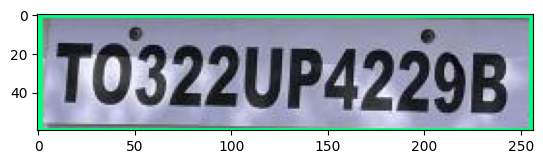

In [193]:
for idx,box in enumerate(boxes):
    roi = box*[height,width,height,width]
    region=image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader=easyocr.Reader(['en'])
    ocr_result=reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region,cv2.COLOR_BGR2RGB))

In [199]:
region_threshold=0.6

In [200]:
def filter_text(region,ocr_result,region_threshold):
    rectangle_size=region.shape[0]*region.shape[1]
    plate=[]
    for result in ocr_result:
        length=np.sum(np.subtract(result[0][1], result[0][0]))
        width=np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height/rectangle_size>region_threshold:
            plate.append(result[1])
    return plate

In [201]:
filter_text(region,ocr_result,region_threshold)

['T0322UP4229B']

In [197]:
region_threshold

0.6

In [96]:
def ocr_it(image,detections,detection_threshold,region_threshold):
    scores=list(filter(lambda x:x>detection_threshold,detections['detection_scores']))
    boxes=detections['detection_boxes'][:len(scores)]
    classes=detections['detection_classes'][:len(scores)]
    
    width=image.shape[1]
    height=image.shape[0]
    for idx,box in enumerate(boxes):
        roi = box*[height,width,height,width]
        region=image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader=easyocr.Reader(['en'])
        ocr_result=reader.readtext(region)
        text=filter_text(region,ocr_result,region_threshold)
        
        plt.imshow(cv2.cvtColor(region,cv2.COLOR_BGR2RGB))
        print(text)
        return text,region
    
    

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['T0322UP4229B']


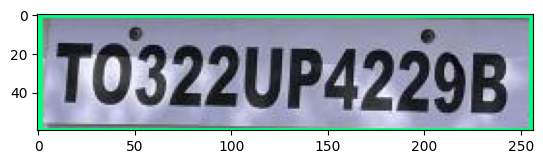

In [97]:
text,region=ocr_it(image_np_with_detections,detections,detection_threshold,region_threshold)

In [169]:
import csv
import uuid
import io

In [170]:
uuid.uuid1()

UUID('8c7c252d-a6bc-11ed-8405-5414f3aa0e41')

In [175]:
def save_results(text, region, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)

In [176]:
save_results(text, region, 'detection_results.csv', 'Detection_Images')

# 10. Real Time Detections from your Webcam

In [16]:
!pip uninstall opencv-python-headless -y

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DL 7C0 1939']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['dL 7C0', '1939']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DL7CO 1939']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['OL ZC0 1939]']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]
['DL 7C0 1939']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Ibladcontont']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['OL 7c0 1939']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['OLZCO 1939']
['dL 7c0 !939]']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['1', '1']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DL 7C0 1939']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


["~'4Y"]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['oL 7c0 1939']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DL 7C0 1939']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DL 7C0 1939']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DL7C0 1939']
['DL 7C0 1939']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['0LZL0']


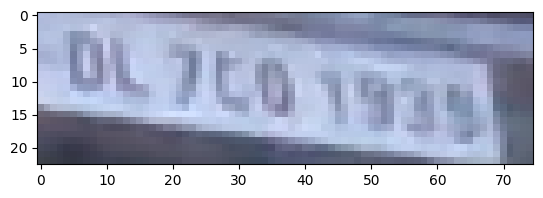

In [202]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    try:
        text,region=ocr_it(image_np_with_detections,detections,detection_threshold,region_threshold)
        save_results(text, region, 'realtimeresults.csv', 'Detection_Images')
    except:
        pass

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break